# Advanced Regression assginment: House Price Prediction
This assignment will be split across into the following parts:
- Data Import and Cleaning 
- Data Exploration(EDA)
- Data Preparation
- Model Building and Evaluation

In [1]:
# Importing initially required packages
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',100)

## 1. Data Import and Cleaning

In [2]:
housing_df=pd.read_csv('train.csv')
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Drop ID column as it is unique and does'nt add any value to the predictive model.
housing_df.drop(columns='Id',inplace=True)

In [4]:
k=round(housing_df.isna().sum()/housing_df.shape[0]*100,2)
k=k[k!=0]
k=pd.DataFrame(k,columns=['Missing%'])
k=pd.concat((k,pd.DataFrame(housing_df[k.index].dtypes,columns=['DataType'])),axis=1)
k
#Some missing values mean that a particular feature is not available to that house.
#So the first step is to handle off such cases according to the data_description.txt provided.

,Missing%,DataType
LotFrontage,17.74,float64
Alley,93.77,object
MasVnrType,0.55,object
MasVnrArea,0.55,float64
BsmtQual,2.53,object
BsmtCond,2.53,object
BsmtExposure,2.60,object
BsmtFinType1,2.53,object
BsmtFinType2,2.60,object
Electrical,0.07,object


In [5]:
housing_df['Alley'].fillna('No alley access',inplace=True)
housing_df['Alley'].value_counts(dropna=False)

No alley access    1369
Grvl                 50
Pave                 41
Name: Alley, dtype: int64

In [6]:
housing_df['BsmtQual'].fillna('No Basement',inplace=True)
housing_df['BsmtQual'].value_counts(dropna=False)

TA             649
Gd             618
Ex             121
No Basement     37
Fa              35
Name: BsmtQual, dtype: int64

In [7]:
housing_df['BsmtCond'].fillna('No Basement',inplace=True)
housing_df['BsmtCond'].value_counts(dropna=False)

TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64

In [8]:
housing_df['BsmtExposure'].fillna('No Basement',inplace=True)
housing_df['BsmtExposure'].value_counts(dropna=False)

No             953
Av             221
Gd             134
Mn             114
No Basement     38
Name: BsmtExposure, dtype: int64

In [9]:
housing_df['BsmtFinType1'].fillna('No Basement',inplace=True)
housing_df['BsmtFinType1'].value_counts(dropna=False)

Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No Basement     37
Name: BsmtFinType1, dtype: int64

In [10]:
housing_df['BsmtFinType2'].fillna('No Basement',inplace=True)
housing_df['BsmtFinType2'].value_counts(dropna=False)

Unf            1256
Rec              54
LwQ              46
No Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64

In [11]:
housing_df['FireplaceQu'].fillna('No Fireplace',inplace=True)
housing_df['FireplaceQu'].value_counts(dropna=False)

No Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

In [12]:
housing_df[['GarageType','GarageFinish','GarageQual','GarageCond']]=housing_df[['GarageType','GarageFinish','GarageQual','GarageCond']].fillna('No Garage')

In [13]:
housing_df['PoolQC'].fillna('No Pool',inplace=True)
housing_df['PoolQC'].value_counts(dropna=False)

No Pool    1453
Gd            3
Ex            2
Fa            2
Name: PoolQC, dtype: int64

In [14]:
housing_df['Fence'].fillna('No Fence',inplace=True)
housing_df['Fence'].value_counts(dropna=False)

No Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64

In [15]:
housing_df['MiscFeature'].fillna('None',inplace=True)
housing_df['MiscFeature'].value_counts(dropna=False)

None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [16]:
k=round(housing_df.isna().sum()/housing_df.shape[0]*100,2)
k=k[k!=0]
k=pd.DataFrame(k,columns=['Missing%'])
k=pd.concat((k,pd.DataFrame(housing_df[k.index].dtypes,columns=['DataType'])),axis=1)
k#columns having null values that needs to be handled

,Missing%,DataType
LotFrontage,17.74,float64
MasVnrType,0.55,object
MasVnrArea,0.55,float64
Electrical,0.07,object
GarageYrBlt,5.55,float64


In [17]:
housing_df['LotFrontage'].fillna(housing_df['LotFrontage'].median(),inplace=True)
housing_df['MasVnrArea'].fillna(housing_df['MasVnrArea'].median(),inplace=True)
#Imputing missing values in the numerical columns with their medians

In [18]:
round(housing_df['MasVnrType'].value_counts(dropna=False)/housing_df.shape[0]*100,2) # Impute null with None

None       59.18
BrkFace    30.48
Stone       8.77
BrkCmn      1.03
NaN         0.55
Name: MasVnrType, dtype: float64

In [19]:
housing_df['MasVnrType'].fillna('None',inplace=True)

In [20]:
round(housing_df['Electrical'].value_counts(dropna=False)/housing_df.shape[0]*100,2) #Impute with SBrkr
#Highly skwed will drop later

SBrkr    91.37
FuseA     6.44
FuseF     1.85
FuseP     0.21
Mix       0.07
NaN       0.07
Name: Electrical, dtype: float64

In [21]:
housing_df['Electrical'].fillna('SBrkr',inplace=True)

In [22]:
k=round(housing_df['GarageYrBlt'].value_counts(dropna=False)/housing_df.shape[0]*100,2) #Replace with 2005
k.nlargest()

NaN        5.55
 2005.0    4.45
 2006.0    4.04
 2004.0    3.63
 2003.0    3.42
Name: GarageYrBlt, dtype: float64

## 2. Data Exploration (EDA)

In [23]:
housing_df['GarageYrBlt'].fillna('2005',inplace=True)
housing_df['GarageYrBlt']=housing_df['GarageYrBlt'].astype(int) #Converting from float to int

In [24]:
#Year columns can be converted to number of Years by subtracting it with max(Year)
housing_df[['YrSold','GarageYrBlt','YearBuilt','YearRemodAdd']]=housing_df[['YrSold','GarageYrBlt','YearBuilt','YearRemodAdd']].apply(lambda x:max(x)-x)

In [25]:
housing_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,7,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,7,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,None,0,2,2,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,34,34,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,34,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,None,0,5,3,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,9,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,9,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,None,0,9,2,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,95,40,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,12,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,None,0,2,4,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,10,10,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,10,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,None,0,12,2,WD,Normal,250000


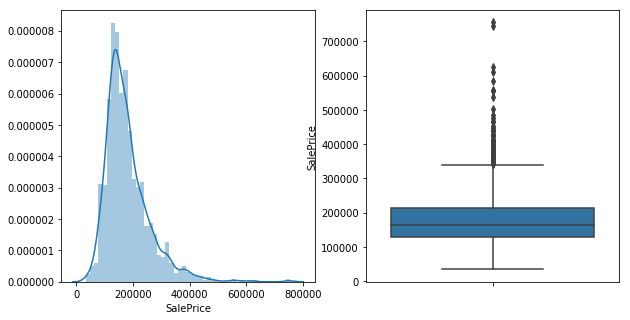

In [26]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(housing_df['SalePrice']) #Right Skewed
plt.subplot(1,2,2)
sns.boxplot(y=housing_df['SalePrice'])

- Target variable is showing heavy skewness and hence we have to use a log transformation to try and normalize it.

In [27]:
housing_df['SalePrice']=np.log1p(housing_df['SalePrice']) # Log transformation

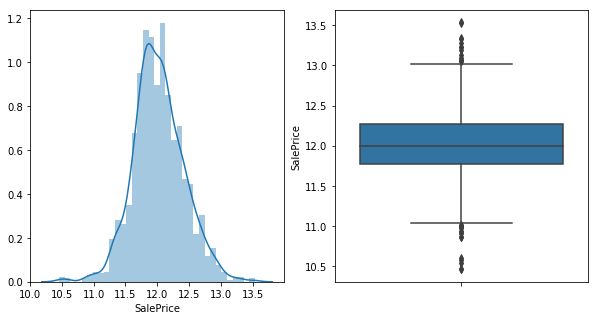

In [28]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(housing_df['SalePrice'])
plt.subplot(1,2,2)
sns.boxplot(y=housing_df['SalePrice']) #Normally distributed

In [29]:
cat_cols=list(housing_df.select_dtypes('object').columns)
num_cols=list(set(housing_df.columns)-set(cat_cols))

In [30]:
#Transforming some numerical variables that were actually categorical
temp=['OverallQual','BsmtFullBath','MoSold','BedroomAbvGr','OverallCond','HalfBath','Fireplaces','GarageCars','TotRmsAbvGrd','FullBath','MSSubClass','BsmtHalfBath','KitchenAbvGr','YrSold']
housing_df[temp]=housing_df[temp].astype('object')
cat_cols=list(housing_df.select_dtypes('object').columns)
num_cols=list(set(housing_df.columns)-set(cat_cols))

In [31]:
cols=[]
for i in cat_cols:
    k=housing_df[i].value_counts(dropna=False)/housing_df.shape[0]*100
    if(k.nlargest(1).values[0]>=90):
        cols.append(i)
cat_cols=list(set(cat_cols)-set(cols)) #Removing highly imbalanced category cols from the study

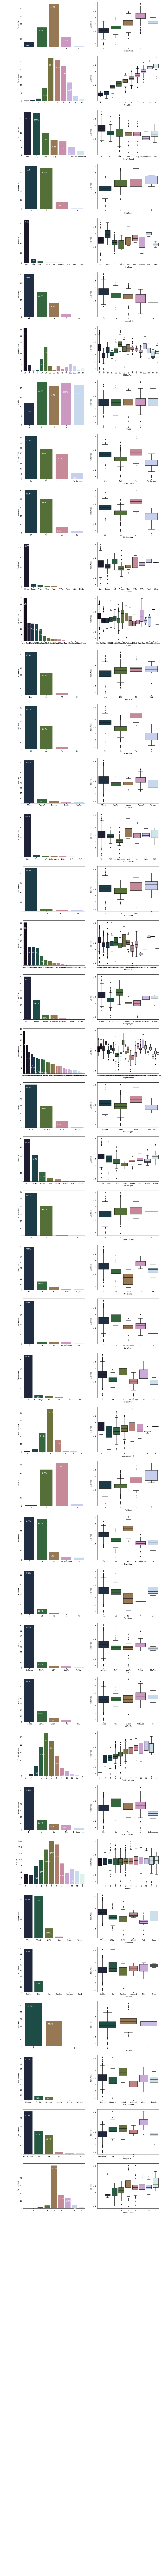

In [32]:
plt.figure(figsize=(15,250))
c=1
for i in cat_cols:
    plt.subplot(41,2,c)
    data=pd.DataFrame(housing_df[i].value_counts()/housing_df.shape[0]*100)
    ax=sns.barplot(x=data.index,y=data[i],data=data,palette="cubehelix")
    for p in ax.patches:
            ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+0.1, p.get_height()-5),color='white',size=10)
    c=c+1
    
    plt.subplot(41,2,c)
    sns.boxplot(x=i,y='SalePrice',data=housing_df,palette='cubehelix')
    c=c+1

**Inference**:


Some additional features will also be removed, as it is having the same median sale price distribution across categories:
- MoSold
- YrSold


**Top contributing features to SalePrice that could identified from the above plots were**:
- OverallQual
- KitchenQual
- HeatingQC
- BsmtQual

In [33]:
drop_list=cols[:]
drop_list.extend(['MoSold','YrSold']) # Adding MoSold and YrSold to drop list

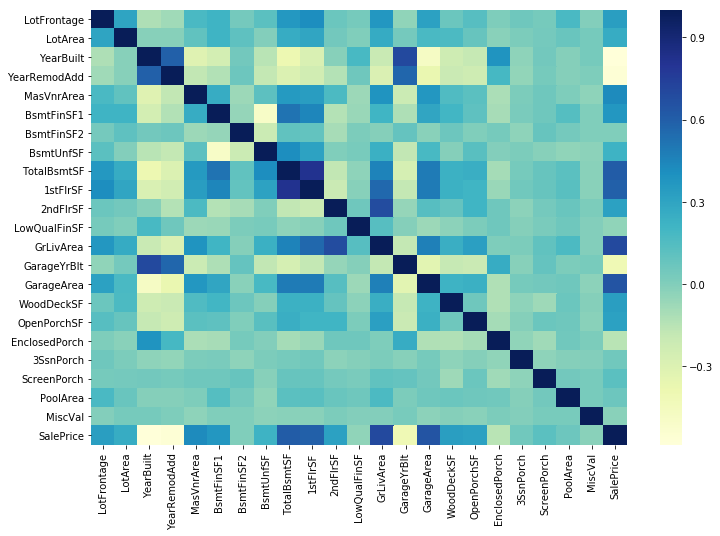

In [34]:
plt.figure(figsize=(12,8)) 
sns.heatmap(housing_df.corr(),cmap="YlGnBu") #Heat Map of the housing_df

In [35]:
#Checking for top correlations other than with SalePrice
corr = housing_df.corr().where(np.triu(np.ones(housing_df.corr().shape), k=1).astype(np.bool))
corr = corr.abs().unstack().reset_index()
corr.columns = ['Var1', 'Var2', 'Corr']
corr.dropna(subset = ['Corr'], inplace = True)
corr[corr['Var1']!='SalePrice'].sort_values('Corr', ascending = False)[:5] 

,Var1,Var2,Corr
215,1stFlrSF,TotalBsmtSF,0.819530
301,GarageYrBlt,YearBuilt,0.700098
286,GrLivArea,2ndFlrSF,0.687501
71,YearRemodAdd,YearBuilt,0.592855
302,GarageYrBlt,YearRemodAdd,0.571369


In [36]:
corr[corr['Var1']=='SalePrice'].sort_values('Corr', ascending = False)[:10] #Top correlation with SalePrice

,Var1,Var2,Corr
518,SalePrice,GrLivArea,0.700927
520,SalePrice,GarageArea,0.650888
514,SalePrice,TotalBsmtSF,0.612134
515,SalePrice,1stFlrSF,0.596981
508,SalePrice,YearBuilt,0.586570
509,SalePrice,YearRemodAdd,0.565608
510,SalePrice,MasVnrArea,0.426776
519,SalePrice,GarageYrBlt,0.406004
511,SalePrice,BsmtFinSF1,0.372023
506,SalePrice,LotFrontage,0.335292


In [37]:
# Creating a new feature TotalSF which is the sum of bsmtsf,1stFlrSF and 2ndFlrSF
housing_df['TotalSF']=housing_df['TotalBsmtSF'] + housing_df['1stFlrSF'] + housing_df['2ndFlrSF']

**GarageArea, 1stFlrSF, TotRmsAbvGrd** will be removed based on correlation with SalePrice

In [38]:
num_cols.remove('SalePrice')

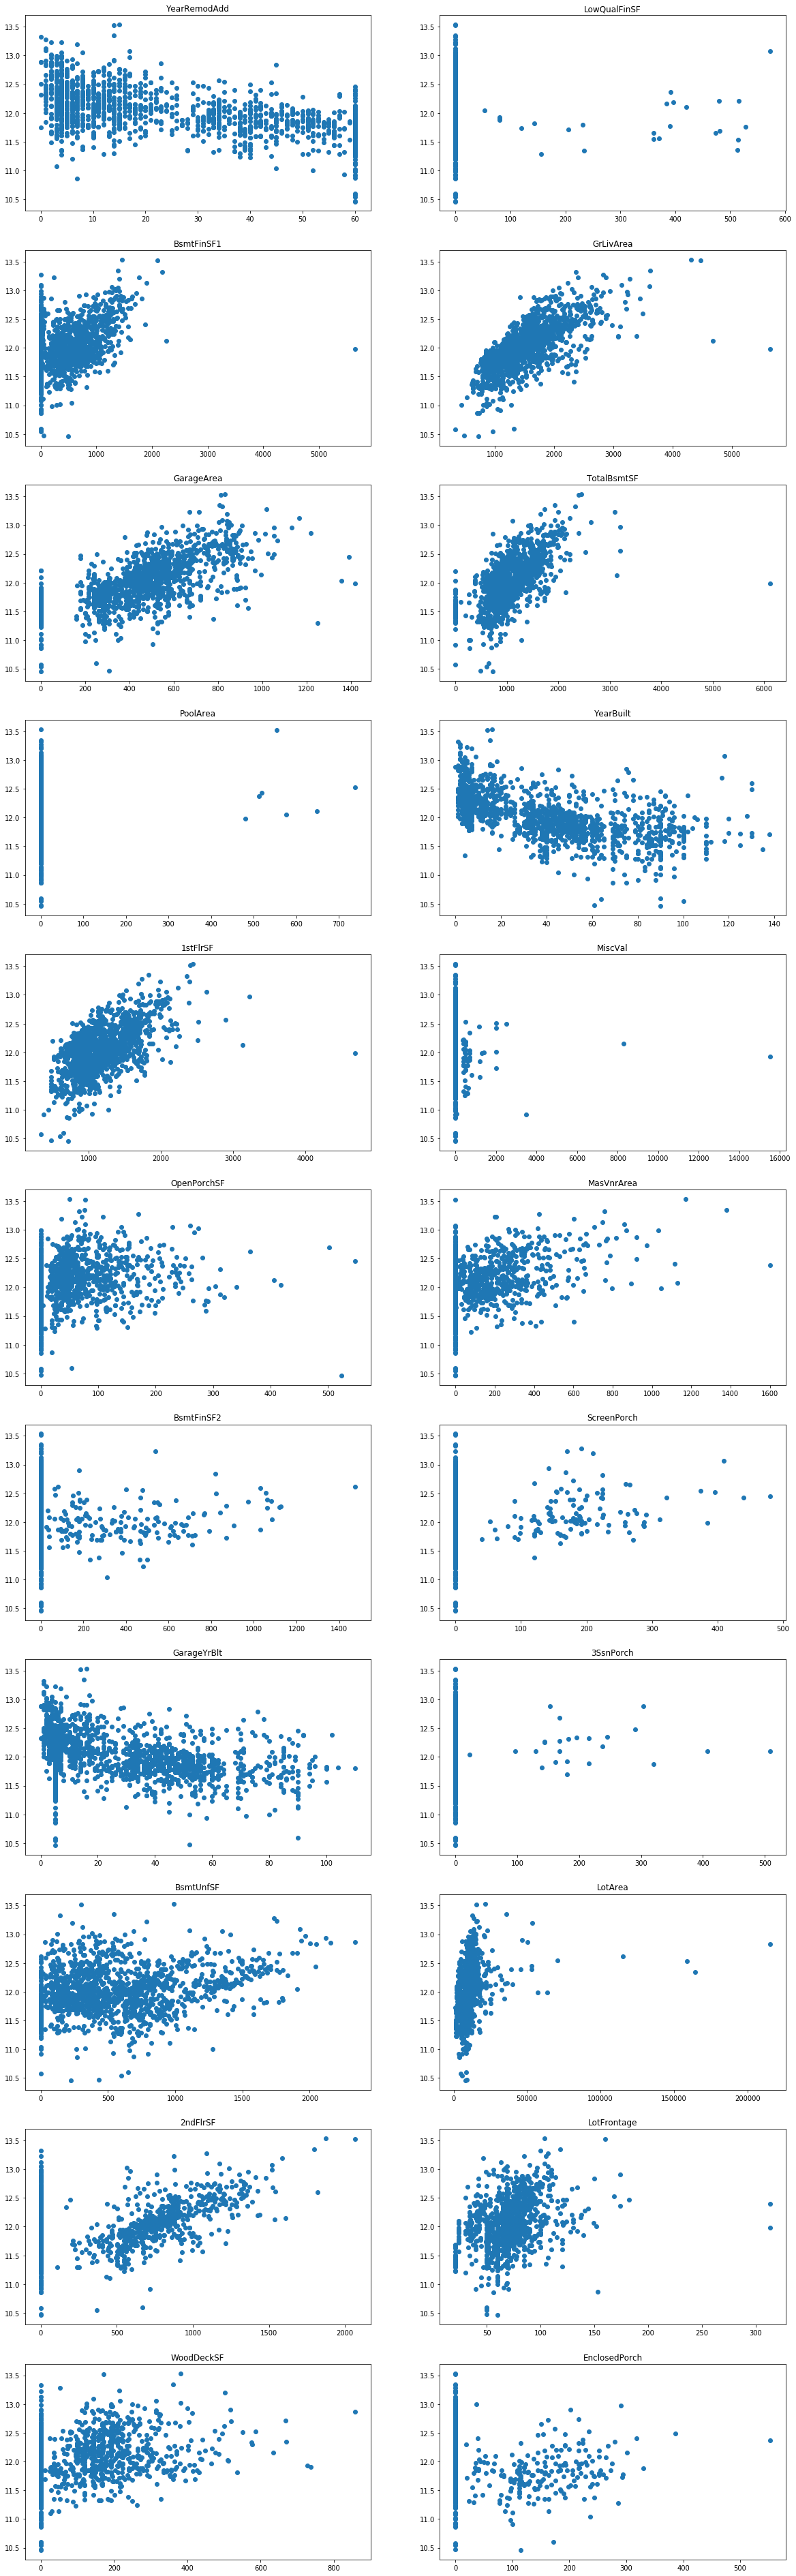

In [39]:
plt.figure(figsize=(20,75))
for i,j in enumerate(num_cols):
    plt.subplot(12,2,i+1)
    plt.scatter(x=j,y='SalePrice',data=housing_df)
    plt.title(j)

**Inference:**
After analysing the above scatter plots and heatmap, I've ended up with the following results:
- Some features are having little to no relation with SalePrice and they should be removed from further analysis and model building :
    - 3SsnPorch
    - PoolArea
    - MiscVal
    - LowQualFinSF



- Features having the highest correlation with SalePrice are:
    - OverallQual
    - GarageArea
    - TotalBsmtSF
    

In [40]:
drop_list.extend(['3SsnPorch','PoolArea','MiscVal','LowQualFinSF'])

## 3. Data Preparation

In [41]:
df=housing_df.drop(columns=drop_list) #Creating the final dataframe that will be used to create the model
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,SaleType,SaleCondition,SalePrice,TotalSF
0,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,7,7,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,No Fireplace,Attchd,7,RFn,2,548,TA,0,61,0,0,No Fence,WD,Normal,12.247699,2566
1,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,34,34,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,34,RFn,2,460,TA,298,0,0,0,No Fence,WD,Normal,12.109016,2524
2,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,9,8,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,9,RFn,2,608,TA,0,42,0,0,No Fence,WD,Normal,12.317171,2706
3,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,95,40,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,12,Unf,3,642,TA,0,35,272,0,No Fence,WD,Abnorml,11.849405,2473
4,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,10,10,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,10,RFn,3,836,TA,192,84,0,0,No Fence,WD,Normal,12.429220,3343


In [42]:
#Selecting categorical and numerical columns
cat_cols=list(df.select_dtypes('object').columns)
num_cols=list(set(df.columns)-set(cat_cols))
num_cols.remove('SalePrice')

In [43]:
df=pd.concat((df,pd.get_dummies(df[cat_cols],drop_first=True)),axis=1)
df.drop(columns=cat_cols,inplace=True)
df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,TotalSF,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_

In [44]:
y=df.pop('SalePrice')
X=df
# Train Test Split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [45]:
#Scaling numerical variables
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## 4. Model Building and Evaluation

In [46]:
#Importing required packages for model building and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error

### Ridge Regression

In [47]:
params={'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
#Defining the parameter range for Ridge regression

ridge=Ridge()

#Cross Validation

folds=5
model_cv=GridSearchCV(estimator=ridge,
                     param_grid=params,
                     scoring='neg_mean_absolute_error',
                     cv=folds,
                     return_train_score=True,
                     verbose=1)

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [48]:
model_cv.best_params_ #Best parameter

{'alpha': 500}

In [49]:
ridge=Ridge(alpha=500) #Using best parameter to train regressor model
model_ridge=ridge.fit(X_train,y_train)
y_train_pred=np.exp(model_ridge.predict(X_train))
print(f'R2 score for Train set: {round(r2_score(np.exp(y_train),y_train_pred),2)}')

y_test_pred=np.exp(model_ridge.predict(X_test))
print(f'R2 score for Test set: {round(r2_score(np.exp(y_test),y_test_pred),2)}')

R2 score for Train set: 0.88
R2 score for Test set: 0.87


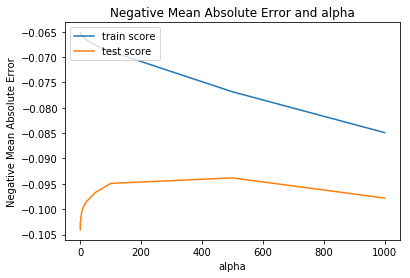

In [50]:
cv_results = pd.DataFrame(model_cv.cv_results_) 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting train-test score to visualize the error variation across parameter values
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [60]:
# ridge model parameters
model_parameters = list(model_ridge.coef_)
model_parameters.insert(0, model_ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
k=list(zip(cols, model_parameters))
print('\033[1m'+'Top 10 features by Ridge Regression model are:')
sorted(k, key = lambda x:abs(x[1]),reverse=True)[1:10]

Top 10 features by Ridge Regression model are:


[('GrLivArea', 0.027),
 ('OverallQual_9', 0.025),
 ('TotalSF', 0.023),
 ('YearRemodAdd', -0.022),
 ('1stFlrSF', 0.021),
 ('OverallQual_8', 0.021),
 ('MSSubClass_30', -0.018),
 ('GarageArea', 0.017),
 ('Neighborhood_Crawfor', 0.017)]

In [52]:
print('Mean Absolute Error on Train set: '+'\033[1m'+str(round(mean_absolute_error(np.exp(y_train),y_train_pred)/100000,5)))
print('\033[0m'+'Mean Absolute Error on Test set: '+'\033[1m'+str(round(mean_absolute_error(np.exp(y_test),y_test_pred)/100000,5)))

Mean Absolute Error on Train set: 0.14458
Mean Absolute Error on Test set: 0.16951


### Lasso Regression

In [53]:
params={'alpha':[0.0001,0.0005,0.001,0.005, 0.01, 0.05 ]}
#Defining the parameter range for Lasso regression

lasso=Lasso()

#Cross Validation

folds=5
model_cv=GridSearchCV(estimator=lasso,
                     param_grid=params,
                     scoring='neg_mean_absolute_error',
                     cv=folds,
                     return_train_score=True,
                     verbose=1)

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [54]:
model_cv.best_params_ #Best parameter

{'alpha': 0.005}

In [55]:
lasso=Lasso(alpha=0.005)#Using best parameter to train regressor model
lasso_lm=lasso.fit(X_train,y_train)
y_train_pred=np.exp(lasso_lm.predict(X_train))
print(f'R2 score for Train set: {round(r2_score(np.exp(y_train),y_train_pred),2)}')

y_test_pred=np.exp(lasso_lm.predict(X_test))
print(f'R2 score for Test set: {round(r2_score(np.exp(y_test),y_test_pred),2)}')

R2 score for Train set: 0.88
R2 score for Test set: 0.86


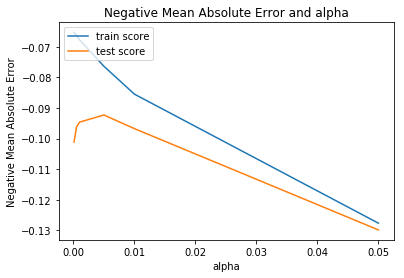

In [56]:
cv_results=pd.DataFrame(model_cv.cv_results_)
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting train-test score to visualize the error variation across parameter values
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [57]:
#lasso model parameters
model_parameters = list(lasso_lm.coef_)
model_parameters.insert(0, lasso_lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
l=list(zip(cols, model_parameters))
print('\033[1m'+'Top 10 features by Lasso Regression model are:')
sorted(l,key=lambda x:abs(x[1]),reverse=True)[1:10]

Top 10 features by Lasso Regression model are:


[('GrLivArea', 0.079),
 ('TotalSF', 0.057),
 ('OverallQual_9', 0.04),
 ('YearRemodAdd', -0.038),
 ('OverallQual_8', 0.038),
 ('YearBuilt', -0.037),
 ('GarageArea', 0.027),
 ('FireplaceQu_No Fireplace', -0.027),
 ('Neighborhood_Crawfor', 0.021)]

In [58]:
print('Mean Absolute Error on Train set: '+'\033[1m'+str(round(mean_absolute_error(np.exp(y_train),y_train_pred)/100000,5)))
print('\033[0m'+'Mean Absolute Error on Test set: '+'\033[1m'+str(round(mean_absolute_error(np.exp(y_test),y_test_pred)/100000,5)))

Mean Absolute Error on Train set: 0.14619
Mean Absolute Error on Test set: 0.17232


# Conclusion

The optimal values of lambda for ridge and lasso regression are:

Ridge Regression : **500**  
Lasso Regression : **0.005**

Top contributing variables on SalePrice according to Ridge Regression are:
- GrLivArea: Sale Price Increases with Increase in Living area Square Feet
- OverallQual: Sale Price is higher for houses with higher OverallQual Ratings
- TotalSF: Sale Price Increase with Increase in Total Square Feet of the building
- YearRemodAdd: Sale Price Decrease with years since Remodelling
- 1stFloorSF: Sale Price Increases with Increase in Square Feet of 1st Floor
- GarageArea: Sale Price Increases with Increase in Garage Area
- Neighbourhood: Price is dependent on the Locale of the house (Crawfor has the highest impact)
- MSSubclass: Houses classified as MSSubclass 30 have lower SalePrice than the rest


Top contributing variables on SalePrice according to Lasso Regression are:
- GrLivArea: Sale Price Increases with Increase in Living area Square Feet
- TotalSF: Sale Price Increase with Increase in Total Square Feet of the building
- OverallQual: Sale Price is higher for houses with higher OverallQual Ratings
- YearRemodAdd: Sale Price Decrease with years since Remodelling
- YearBuilt: Sale Price Decrease with age of the building
- GarageArea: Sale Price Increases with Increase in Garage Area
- Fireplace: Sale Price is lesser for places with No Fireplace
- Neighbourhood: Price is dependent on the Locale of the house (Crawfor has the highest impact)

**R2 Value by Ridge Model (Test Error): 0.87  
R2 Value by Lasso Model (Test Error): 0.86**

**Ridge: 
Mean Absolute Error on Train set: 0.14458  
Mean Absolute Error on Test set: 0.16951**

**Lasso:
Mean Absolute Error on Train set: 0.14619  
Mean Absolute Error on Test set: 0.17232**

##### Ridge is giving better results than Lasso